# ipython 入門4

numpy その２

## 演算

numpy は__行列__や__ベクトル__などの数字の集まりを扱いますが，
一つの数字（__スカラー__）との四則演算は簡単にできます．

In [3]:
import numpy as np

a = np.array([1,2,3,4])

print( a+1 )
print( a-2 )
print( a*3 )
print( a/4 )      # 整数どうし割り算なので整数部分のみ
print( a/4.0 )    # 浮動小数点との割り算なので少数まで計算
print( a**2 )     # ２乗

 [2 3 4 5]
[-1  0  1  2]
[ 3  6  9 12]
[0 0 0 1]
[ 0.25  0.5   0.75  1.  ]
[ 1  4  9 16]


行列，ベクトルどうしの四則演算は要素ごとになります．

In [4]:
import numpy as np

b = np.ones(4)*2

print( "a", a)
print( "b", b)
print( "a+b", a+b )
print( "a*b", a*b )

a [1 2 3 4]
b [ 2.  2.  2.  2.]
a+b [ 3.  4.  5.  6.]
a*b [ 2.  4.  6.  8.]


行列の積は通常以下のように計算されますが，これを計算するには，dot を使います．

$
\begin{pmatrix}
   a & b\\
   c & d
\end{pmatrix}
\begin{pmatrix}
   p & q\\
   r & s
\end{pmatrix}
=
\begin{pmatrix}
   a \times p + b \times r & a \times q + b \times s\\
   c \times q + d \times s & c \times q + d \times s
\end{pmatrix}
$

In [16]:
c = np.ones( (3,3) )   # 3x3 の要素がすべて1の行列

print( "c\n", c)

print( "c*c\n", c*c)             # 要素ごとの積
print( "c.dot(c)\n", c.dot(c))   # 行列の積

c
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
c*c
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
c.dot(c)
[[ 3.  3.  3.]
 [ 3.  3.  3.]
 [ 3.  3.  3.]]


## 例：回転
回転行列 $T(\theta)$ は

$
T(\theta)=
\begin{pmatrix}
 \cos \theta & -\sin \theta \\
 \sin \theta & \cos \theta
\end{pmatrix}
$

のように書くことができます．例えば，(1,0) の点 $p$ を原点を中心に30度回転させる計算は以下のようになります．

$
T(\pi/6) r =
\begin{pmatrix}
  \cos \pi/6 & -\sin \pi/6 \\
  \sin \pi/6 & \cos \pi/6
\end{pmatrix}
\begin{pmatrix}
  1 \\
  0
\end{pmatrix}
=
\begin{pmatrix}
  \cos \pi/6 \\
  \sin \pi/6
\end{pmatrix}
$

(1,0) は縦ベクトルとして表現されます．また，角度は radian で表現され，$\pi$ は 180 [deg（度）] に相当します．

これを numpy を使って計算すると，以下のようになります．

In [6]:
p = np.array([ [1], 
               [0] ])

theta = 30.0 * np.pi/180.0
T = np.array([ [np.cos(theta), -np.sin(theta)],
               [np.sin(theta),  np.cos(theta)]] )

print( p )
print( T )
print( T.dot(p) )

[[1]
 [0]]
[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
[[ 0.8660254]
 [ 0.5      ]]


プロットをして，もう少し多くの点を回転させてみましょう．x軸上の (1,0), (2,0), (3,0), (4,0), (5,0) の点を 30 度回転させてみましょう．

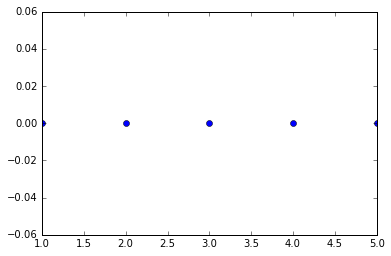

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5])    # ５点のx座標
y = np.array([0,0,0,0,0])    # ５点のy座標

plt.plot(x,y, "o")

p = np.array([x,y])   # ５つの点を一つの行列にまとめる
tp = T.dot(p)         # 回転!



### 練習
上のプログラムを改変して，以下のような図を作成してください．

![](kaiten.png)

NameError: name 'T' is not defined

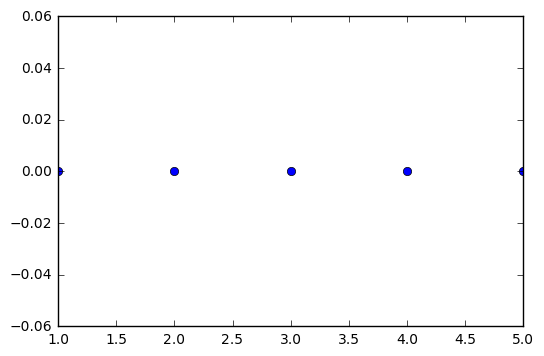

In [4]:
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5])    # ５点のx座標
y = np.array([0,0,0,0,0])    # ５点のy座標


plt.plot(x,y, "o")

p = np.array([x,y])

tp = p.copy()
for i in range(12):
    tp=T.dot(p)
    XXXXs


## 基本的な縮約計算

### 総和

In [43]:
# 総和
x = np.array([1,2,3,4])
np.sum(x)

10

In [46]:
# 行，列ごとの総和

x = np.array([[1,2],[3,4]])

print( x )
print( x.sum(axis=0) )    # 行の方向
print( x.sum(axis=1) )    # 列の方向

[[1 2]
 [3 4]]
[4 6]
[3 7]
[1 3]


### 最大，最小

In [49]:
x = np.array( [1,2,3,4] )
print( "min=", x.min() )               # 最小値
print( "max=", x.max() )               # 最大値
print( "index of xmin=", x.argmin() )  # 最小値の場所
print( "index of xmax=", x.argmax() )  # 最大値の場所

min= 1
max= 4
index of xmin= 0
index of xmax= 3


### 統計

あるテストで，以下のような成績をとりました．

| | 国語 | 英語 | 数学 | 社会 | 理科 | 倫理 |
|--| --- | --- | --- | --- | --- | --- |
|A | 30 | 80 | 70 | 60 | 40 | 80 |
|B | 40 | 70 | 30 | 40 | 80 | 50 |
|C | 80 | 60 | 40 | 80 | 40| 80 |
|D | 70 | 60 | 70 | 50 | 50 | 50 |

1. 各自の平均点を求めてください．
2. 教科ごとの平均点を求めてください．
3. 英語で最も成績が良かったのは誰かを，argmax を使って求めてください．
4. 合計点の成績が最も良かったのは誰かを，argmax を使って求めてください．

In [ ]:
seiseki = np.array([ [30, 80, 70, 60, 40, 80],
                     [40, 70, 30, 40, 80, 50],
                     [80, 60, 40, 80, 40, 80],
                     [70, 60, 70, 50, 50, 50] ])

XXXX

## 配列のシェイプ操作

行列の行と列を入れ替える操作を__転置__といい，その操作を$T$を使って表現します．

$
\begin{pmatrix}
 1 & 2 \\
 3 & 4
\end{pmatrix}
^T
=
\begin{pmatrix}
1 & 3 \\
2 & 4
\end{pmatrix}
$

In [52]:
a = np.array([ [1,2], [3,4] ])
print( a )
print( a.T )

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


### 練習
> 犬の画像を転置してみてください．

In [6]:
from PIL import Image          # 画像を扱う PIL というパッケージを読み込み

image = Image.open("dog.jpg").convert('L')  # 画像を読み込み
npimage = np.asarray(image)    # 画像を numpy の array に変換

ximage = XXXX

plt.imshow( ximage)

NameError: name 'XXXX' is not defined

### 練習
> 犬の白黒画像で，最も明るい点の値とその座標を求めてください．


218
(array([56, 60]), array([295, 292]))


218

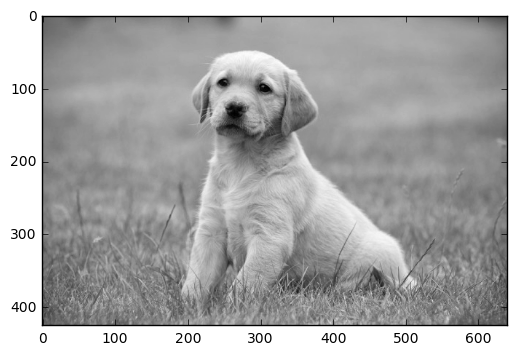

In [12]:
image = Image.open("dog.jpg").convert('L')  # 画像を白黒で読み込み
npimage = np.asarray(image)                 # 画像を numpy の array に変換
plt.imshow( npimage, cmap='gray')           # グレースケールで表示

max_val = npimage.max()
print(max_val)
print(np.where(npimage==max_val))

npimage[56, 295]

In [10]:
a = np.array([1,3,6,4,6])
a.argmax()

2

その他，numpy には，いろいろなツールがあるのですが，新しく出会ったら，その都度調べればよいでしょう．